<a id="header"></a>
# Part 4: levels 62-70

[Return home](../)

In [76]:
from samurai import *
from plotting import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from IPython.display import display
%matplotlib inline

pd.options.display.max_rows = None

These last nine levels are truly the formative levels for Samurai. They add the fundamental traits and actions that give the job its complexity. Up to this point, most decision making was obvious and any alternate decision paths often led to virtually indistinguishable results under ideal conditions. The Kenki mechanic was relatively low pressure as it accumulated slowly and the choices for its spenders were rather limited. We'll see how this changes rapidly over the final leveling stretch.

## lvl 62-67

Level 62 is indeed a gamechanger. The trait Kenki Mastery II adds a Kenki bonus to almost every weaponskill (barring Iaijutsu), significantly increasing our Kenki accrual rate to 10 for combo finishers plus 5 for non finishers, or a net 55 Kenki per 8 GCD rotation (going through all Sen combos). The Kenki Mastery II trait grants Kenki for the following actions:

In [77]:
kenki_table_II = [('Hakaze', 5), ('Shifu', 5), ('Jinpu', 5), ('Enpi', 10),
                 ('Gekko', 5), ('Gekko (rear combo)', 5), 
                 ('Kasha', 5), ('Kasha (side combo)', 5),
                 ('Yukikaze (combo)', 10),
                 ('Fuga', 5), ('Mangetsu (combo)', 5), ('Oka (combo)', 5), ]

kenki_table_df = pd.DataFrame(kenki_table_II, columns=['Weaponskill', 'Kenki granted'])
kenki_table_df.set_index('Weaponskill')
display(kenki_table_df)

,Weaponskill,Kenki granted
0,Hakaze,5
1,Shifu,5
2,Jinpu,5
3,Enpi,10
4,Gekko,5
5,Gekko (rear combo),5
6,Kasha,5
7,Kasha (side combo),5
8,Yukikaze (combo),10
9,Fuga,5


This will net a substantial surplus if we reserve Kenki solely for Hissatsu: Kaiten on our Iaijutsu. Coincidentally, level 62 also grants the ability Hissatsu: Shinten, dealing 300 potency off the GCD at a cost of 25 Kenki on a 1s recast. This is significantly more value than spending on Hissatsu: Kaiten on Kasha/Gekko and only ~16.6% less value than spending Hissatsu: Kaiten on Higanbana or Midare Setsugekka. See part 5 for an in-depth discussion on Kenki spenders.

Level 66 grants the Hissatsu: Seigan ability. Formerly known as Starry Eyes, this ability is only usable under the Open Eyes status, which is granted by successfully reducing damage received while Third Eye is active. At 200 potency with a cost of 15 Kenki, Hissatsu: Seigan is more efficient in potency per Kenki spent than Hissatsu: Shinten and is worth trying to use as much as possible. See part 5 for an in-depth discussion on Third Eye and Kenki spenders.

With the massively increased Kenki generation, let's revisit our single target situations.

### Example Kenki usage only using Hissatsu: Kaiten

In [78]:
sam = Samurai(kenki_mastery=2)

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Jinpu', 'Hissatsu: Kaiten'), ('Higanbana'), ('Gekko'), ('Hakaze'),
           ('Yukikaze'), ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten', 'Meikyo Shisui'),
           ('Midare Setsugekka'), ('Gekko'), ('Yukikaze'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'), ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Hakaze'),
           ('Jinpu'), ('Gekko'), ('Hakaze'), ('Shifu', 'Hissatsu: Kaiten'),
           ('Higanbana'), ('Kasha'), ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ]

In [79]:
df0, average_potency, pps = sam.parse_rotation(actions)
display(df0)

average potency per GCD = 486.5776923076921
average potency per second = 224.627485795


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,5,430.000
2,4.56,Kasha,,400.000,False,True,False,0,10,830.000
3,6.72,Hakaze,,150.000,False,True,False,0,20,980.000
4,8.88,Jinpu,"(Hissatsu: Kaiten,)",280.000,False,True,False,0,25,1260.000
5,11.04,Higanbana,,323.470,True,True,False,0,10,1583.470
6,13.20,Gekko,,503.470,True,True,False,1,10,2086.940
7,15.36,Hakaze,,215.970,True,True,False,1,20,2302.910
8,17.52,Yukikaze,,434.470,True,True,False,1,25,2737.380
9,19.68,Hakaze,,234.945,True,True,True,1,35,2972.325


As you can see, we capped Kenki about a minute into the encounter. Let's add in Hissatsu: Shinten to dump some Kenki.

In [80]:
sam = Samurai(kenki_mastery=2)

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Jinpu', 'Hissatsu: Kaiten'), ('Higanbana'), ('Gekko'), ('Hakaze'),
           ('Yukikaze'), ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten', 'Meikyo Shisui'),
           ('Midare Setsugekka'), ('Gekko'), ('Yukikaze'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'), ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Hakaze'),
           ('Jinpu'), ('Gekko', 'Hissatsu: Shinten'), ('Hakaze'), ('Shifu', 'Hissatsu: Kaiten'),
           ('Higanbana'), ('Kasha'), ('Hakaze'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ]

In [81]:
df1, average_potency, pps = sam.parse_rotation(actions)
display(df1)

average potency per GCD = 525.8546153846153
average potency per second = 242.759588068


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,5,430.000
2,4.56,Kasha,,400.000,False,True,False,0,10,830.000
3,6.72,Hakaze,,150.000,False,True,False,0,20,980.000
4,8.88,Jinpu,"(Hissatsu: Kaiten,)",280.000,False,True,False,0,25,1260.000
5,11.04,Higanbana,,323.470,True,True,False,0,10,1583.470
6,13.20,Gekko,,503.470,True,True,False,1,10,2086.940
7,15.36,Hakaze,,215.970,True,True,False,1,20,2302.910
8,17.52,Yukikaze,,434.470,True,True,False,1,25,2737.380
9,19.68,Hakaze,,234.945,True,True,True,1,35,2972.325


I made the conscious effort to try to spend all the Kenki generated by the end. We have the flexibility of spending Kenki whenever with the 1s recast time on Hissatsu: Shinten. We could even use it every GCD like I did towards the end for increased burst provided we have enough Kenki. 

With the acquisition of Kenki Mastery II and Hissatsu: Shinten at level 62, we net an over 10% increase in potency per second. 

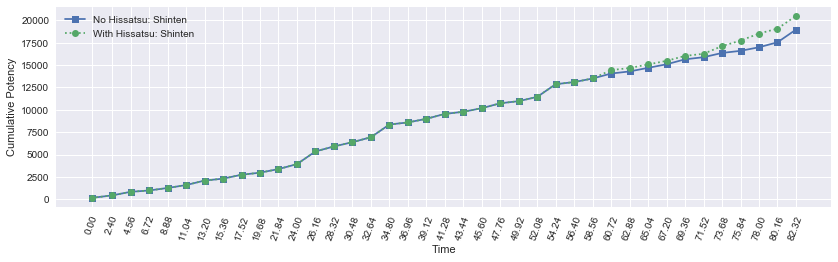

In [82]:
compare_potencies([df0, df1], ['No Hissatsu: Shinten', 'With Hissatsu: Shinten'])

The first 60 seconds or so are identical because I made the decision to not use Hissatsu: Shinten until I nearly capped on Kenki.

### Example Kenki usage with AoE rotations

Hissatsu: Kyuten is learned at level 64 and is the AoE analog of Hissatsu: Shinten, matching it in potency at two targets. However, its value needs to be compared to spending Hissatsu: Kaiten on Tenka Goken. Hissatsu: Kyuten does 150 potency to all targets without AoE downscaling at the cost of 25 Kenki whereas Hissatsu: Kaiten increases the potency of the next weaponskill, in our case Tenka Goken, by 50% at the cost of 20 Kenki. Additionally, Tenka Goken experiences decreased potency per target as target numbers goes up down to a minimum 180 potency for the fifth target and beyond. Let's see each compares as a function of number of targets.

#### Only Hissatsu: Kaiten on Tenka Goken

In [83]:
dfs_aoe_kaiten_only = []
pps_aoe_kaiten_only = []
labels = []

n_target_range = range(2, 8)

for n_targets in n_target_range:
    sam = Samurai(kenki_mastery=2, kenki_gauge=50)
    
    actions = [('Fuga'), ('Oka'), ('Fuga'), ('Mangetsu', 'Hissatsu: Kaiten'), ('Tenka Goken'), 
               ('Fuga'), ('Mangetsu'), ('Fuga'), ('Oka', 'Hissatsu: Kaiten'), 
               ('Tenka Goken'), ('Fuga'), ('Mangetsu'), ('Fuga'),
               ('Oka', 'Hissatsu: Kaiten'), ('Tenka Goken')]
    
    print('number of targets = %s' % n_targets)
    df_temp, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
    dfs_aoe_kaiten_only.append(df_temp)
    pps_aoe_kaiten_only.append(pps)
    
    labels.append('%s targets' % n_targets)
    print('\n')

display(dfs_aoe_kaiten_only[-1])

number of targets = 2
average potency per GCD = 437.2
average potency per second = 182.166666667


number of targets = 3
average potency per GCD = 627.6
average potency per second = 261.5


number of targets = 4
average potency per GCD = 799.2
average potency per second = 333.0


number of targets = 5
average potency per GCD = 952.0
average potency per second = 396.666666667


number of targets = 6
average potency per GCD = 1086.0
average potency per second = 452.5


number of targets = 7
average potency per GCD = 1220.0
average potency per second = 508.333333333




,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.0,Fuga,,700.0,False,False,False,0,50,700.0
1,2.4,Oka,,1000.0,False,False,False,0,55,1700.0
2,4.8,Fuga,,700.0,False,False,False,0,65,2400.0
3,7.2,Mangetsu,"(Hissatsu: Kaiten,)",1000.0,False,False,False,0,70,3400.0
4,9.6,Tenka Goken,,2700.0,False,False,False,0,60,6100.0
5,12.0,Fuga,,700.0,False,False,False,0,60,6800.0
6,14.4,Mangetsu,,1000.0,False,False,False,0,65,7800.0
7,16.8,Fuga,,700.0,False,False,False,0,75,8500.0
8,19.2,Oka,"(Hissatsu: Kaiten,)",1000.0,False,False,False,0,80,9500.0
9,21.6,Tenka Goken,,2700.0,False,False,False,0,70,12200.0


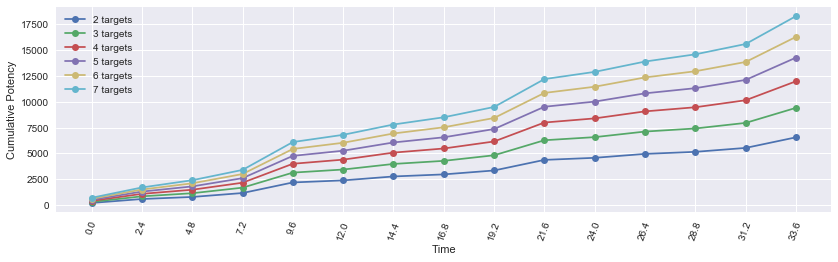

In [84]:
compare_n_potencies(dfs_aoe_kaiten_only, labels)

#### Only Hissatsu: Kyuten

In [85]:
dfs_aoe_kyuten_only = []
pps_aoe_kyuten_only = []
labels = []

n_target_range = range(2, 8)

for n_targets in n_target_range:
    sam = Samurai(kenki_mastery=2, kenki_gauge=50)
    
    actions = [('Fuga'), ('Oka'), ('Fuga'), ('Mangetsu', 'Hissatsu: Kyuten'), ('Tenka Goken'), 
               ('Fuga'), ('Mangetsu'), ('Fuga'), ('Oka', 'Hissatsu: Kyuten'), 
               ('Tenka Goken'), ('Fuga', 'Hissatsu: Kyuten'), ('Mangetsu', 'Hissatsu: Kyuten'), ('Fuga'),
               ('Oka', 'Hissatsu: Kyuten'), ('Tenka Goken')]
    
    print('number of targets = %s' % n_targets)
    df_temp, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
    dfs_aoe_kyuten_only.append(df_temp)
    pps_aoe_kyuten_only.append(pps)
    
    labels.append('%s targets' % n_targets)
    print('\n')

display(dfs_aoe_kyuten_only[-1])

number of targets = 2
average potency per GCD = 468.8
average potency per second = 195.333333333


number of targets = 3
average potency per GCD = 680.4
average potency per second = 283.5


number of targets = 4
average potency per GCD = 876.8
average potency per second = 365.333333333


number of targets = 5
average potency per GCD = 1058.0
average potency per second = 440.833333333


number of targets = 6
average potency per GCD = 1224.0
average potency per second = 510.0


number of targets = 7
average potency per GCD = 1390.0
average potency per second = 579.166666667




,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.0,Fuga,,700.0,False,False,False,0,50,700.0
1,2.4,Oka,,1000.0,False,False,False,0,55,1700.0
2,4.8,Fuga,,700.0,False,False,False,0,65,2400.0
3,7.2,Mangetsu,"(Hissatsu: Kyuten,)",2050.0,False,False,False,0,70,4450.0
4,9.6,Tenka Goken,,1800.0,False,False,False,0,55,6250.0
5,12.0,Fuga,,700.0,False,False,False,0,55,6950.0
6,14.4,Mangetsu,,1000.0,False,False,False,0,60,7950.0
7,16.8,Fuga,,700.0,False,False,False,0,70,8650.0
8,19.2,Oka,"(Hissatsu: Kyuten,)",2050.0,False,False,False,0,75,10700.0
9,21.6,Tenka Goken,,1800.0,False,False,False,0,60,12500.0


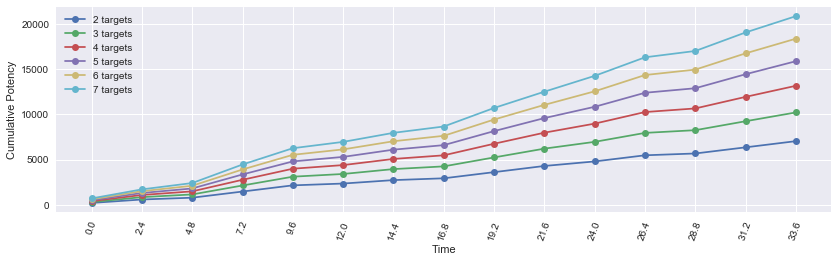

In [86]:
compare_n_potencies(dfs_aoe_kyuten_only, labels)

Now it would be wasteful to use Kenki on Hissatsu: Kaiten with Tenka Goken exclusively as we have a net surplus of Kenki so let's fill in the gaps with Hissatsu: Kyuten.

#### Using Hissatsu: Kaiten on Tenka Goken and Hissatsu: Kyuten with excess Kenki

In [87]:
dfs_aoe_both = []
pps_aoe_both = []
labels = []

n_target_range = range(2, 8)

for n_targets in n_target_range:
    sam = Samurai(kenki_mastery=2, kenki_gauge=50)
    
    actions = [('Fuga'), ('Oka', 'Hissatsu: Kyuten'), ('Fuga'), ('Mangetsu', 'Hissatsu: Kaiten'), ('Tenka Goken'), 
               ('Fuga', 'Hissatsu: Kyuten'), ('Mangetsu'), ('Fuga'), ('Oka', 'Hissatsu: Kaiten'), 
               ('Tenka Goken'), ('Fuga', 'Hissatsu: Kyuten'), ('Mangetsu'), ('Fuga'),
               ('Oka', 'Hissatsu: Kaiten'), ('Tenka Goken')]
    
    print('number of targets = %s' % n_targets)
    df_temp, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
    dfs_aoe_both.append(df_temp)
    pps_aoe_both.append(pps)
    
    labels.append('%s targets' % n_targets)
    print('\n')

display(dfs_aoe_both[-1])

number of targets = 2
average potency per GCD = 497.2
average potency per second = 207.166666667


number of targets = 3
average potency per GCD = 717.6
average potency per second = 299.0


number of targets = 4
average potency per GCD = 919.2
average potency per second = 383.0


number of targets = 5
average potency per GCD = 1102.0
average potency per second = 459.166666667


number of targets = 6
average potency per GCD = 1266.0
average potency per second = 527.5


number of targets = 7
average potency per GCD = 1430.0
average potency per second = 595.833333333




,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.0,Fuga,,700.0,False,False,False,0,50,700.0
1,2.4,Oka,"(Hissatsu: Kyuten,)",2050.0,False,False,False,0,55,2750.0
2,4.8,Fuga,,700.0,False,False,False,0,40,3450.0
3,7.2,Mangetsu,"(Hissatsu: Kaiten,)",1000.0,False,False,False,0,45,4450.0
4,9.6,Tenka Goken,,2700.0,False,False,False,0,35,7150.0
5,12.0,Fuga,"(Hissatsu: Kyuten,)",1750.0,False,False,False,0,35,8900.0
6,14.4,Mangetsu,,1000.0,False,False,False,0,15,9900.0
7,16.8,Fuga,,700.0,False,False,False,0,25,10600.0
8,19.2,Oka,"(Hissatsu: Kaiten,)",1000.0,False,False,False,0,30,11600.0
9,21.6,Tenka Goken,,2700.0,False,False,False,0,20,14300.0


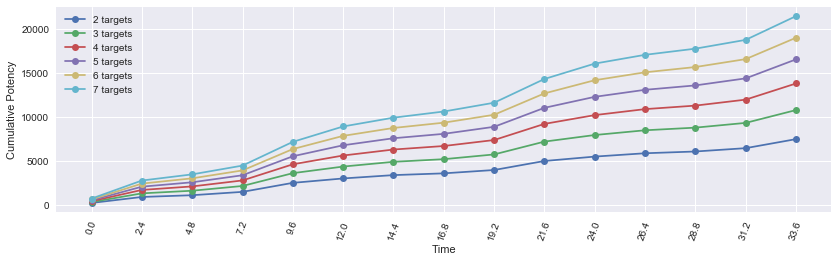

In [88]:
compare_n_potencies(dfs_aoe_both, labels)

#### Potency per Kenki spent as a function of targets

In [89]:
potency_one_tenka = []
labels = []

n_target_range = range(2, 8)

for n_targets in n_target_range:
    sam = Samurai(kenki_mastery=2, kenki_gauge=50)
    sam.has_getsu = True
    sam.has_ka = True
    sam.has_hissatsu_kaiten = True
    
    df, _, _ = sam.parse_rotation([('Tenka Goken')], n_targets=n_targets)
    
    potency_one_tenka.append(df['Potency']/20)

average potency per GCD = 1026.0
average potency per second = 427.5
average potency per GCD = 1458.0000000000002
average potency per second = 607.5
average potency per GCD = 1836.0000000000005
average potency per second = 765.0
average potency per GCD = 2160.0
average potency per second = 900.0
average potency per GCD = 2430.0
average potency per second = 1012.5
average potency per GCD = 2700.0
average potency per second = 1125.0


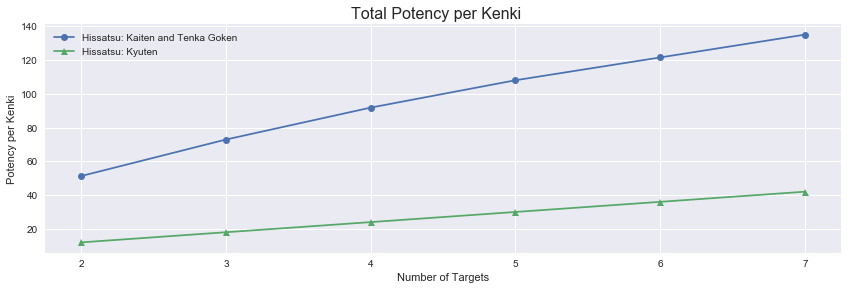

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12,4))
fig.tight_layout(pad=2)

axes.plot(n_target_range, potency_one_tenka, '-o', label='Hissatsu: Kaiten and Tenka Goken')
axes.plot(n_target_range, [n*150/25 for n in n_target_range], '-^', label='Hissatsu: Kyuten')
axes.set_ylabel('Potency per Kenki')
axes.set_xlabel('Number of Targets')
axes.legend(loc='upper left', framealpha=0.5)

fig.suptitle('Total Potency per Kenki')

Expending Kenki on Hissatsu: Kaiten for Tenka Goken is the best bang for your buck, no question. When you only have enough Kenki for Hissatsu: Kaiten or Hissatsu: Kyuten, choose Hissatsu: Kaiten, hands down.

However, as we saw in the two previous examples, using Kenki exclusively on Hissatsu: Kyuten is extremely competitive with using Kenki on both. Additionally, it is superior to using Hissatsu: Kaiten exclusively. We can credit this to the minimal prerequisites for using Hissatsu: Kyuten; even though it costs more Kenki, you do not have to build Sen to use it, unlike Tenka Goken (with Hissatsu: Kaiten).

## Level 68-70

Level 68 is a pivotal shift in how Samurai plays. It grants you Hagakure, an ability on a short 40s cooldown that converts open Sen to Kenki at a 1 to 20 rate. Initially, this came as a headscratcher to many folks: b-but muh Iaijutsu? Samurai post-50 driven by Kenki more than Sen. The addition of powerful Kenki spenders like Hissatsu: Shinten and the level 70 capstone Hissatsu: Guren adds significant potency to the samurai rotation off the GCD. Iaijutsu, while powerful in their own right, cost a GCD and delay Kenki generation from the other weaponskills.

Consider Midare Setsugekka. At the cost of three Sen, it deals 720 potency. If instead of using those three Sen on Iaijutsu, what if we used Hagakure to generate 60 Kenki?

We could spend it on...
- Hissatsu: Guren, for 800+ potency for 50 Kenki.
- Hissatsu: Shinten (x2.4), for 720 potency for 60 Kenki.
- Hissatsu: Kyuten (x2.4), for burst AoE opportunities.

Essentially, Hagakure converts damage potential from being on the GCD to being off the GCD. This grants flexibility in how you produce damage, streamlines the weaponskill rotation, increases Kenki generation, and overall fills out the samurai rotation. See part 5 for in-depth discussion on Hagakure usage.

### Example Hagakure usage

In [91]:
sam = Samurai(kenki_mastery=2)

actions = [('Hakaze'), ('Shifu'), ('Kasha'), 
           ('Hakaze'), ('Jinpu', 'Hissatsu: Kaiten'), ('Higanbana'), ('Gekko', 'Meikyo Shisui'), 
           ('Yukikaze'), ('Kasha', 'Hagakure'), ('Gekko', 'Hissatsu: Guren'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hagakure'), ('Shifu', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Jinpu', 'Hissatsu: Kaiten'), ('Higanbana'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'), ('Midare Setsugekka')
           ]

In [92]:
df2, average_potency, pps = sam.parse_rotation(actions)
display(df2)

average potency per GCD = 545.2244999999999
average potency per second = 251.719529086


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,5,430.000
2,4.56,Kasha,,400.000,False,True,False,0,10,830.000
3,6.72,Hakaze,,150.000,False,True,False,0,20,980.000
4,8.88,Jinpu,"(Hissatsu: Kaiten,)",280.000,False,True,False,0,25,1260.000
5,11.04,Higanbana,,323.470,True,True,False,0,10,1583.470
6,13.20,Gekko,"(Meikyo Shisui,)",503.470,True,True,False,1,10,2086.940
7,15.36,Yukikaze,,434.470,True,True,False,1,20,2521.410
8,17.52,Kasha,"(Hagakure,)",554.070,True,True,True,1,30,3075.480
9,19.68,Gekko,"(Hissatsu: Guren,)",1575.270,True,True,True,1,100,4650.750


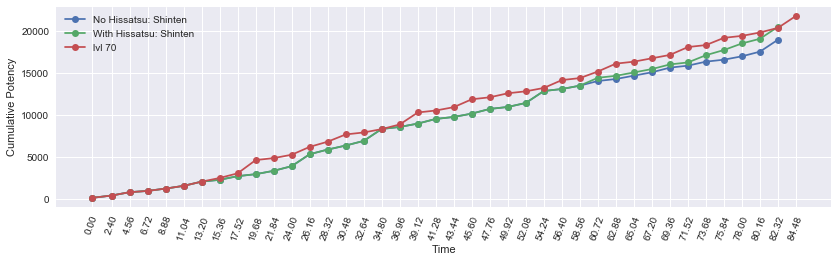

In [93]:
compare_n_potencies([df0, df1, df2], ['No Hissatsu: Shinten', 'With Hissatsu: Shinten', 'lvl 70'])

We can easily observe the impact of increased Kenki generation and spending from level 67 and up. The addition of the devastating Hissatsu: Guren plus the Kenki generated with Hagakure allow us to rapidly pile on damage with an early onslaught of Hissatsu: Shinten. 

Developing an intuition for Kenki management and planning out your weaponskill rotation as each encounter demands are the keys to playing Samurai well.

<a href="#header">back to the top...</a>